# Time-frequency decomposition
### GEOPHYSICAL TUTORIAL, June 2018, by Matt Hall, Agile Scientific, matt@agilescientific.com

## Reproduced in Madagascar (http://www.ahay.org/wiki/Main_Page)

Original source repository: https://github.com/seg/tutorials-2018/tree/master/1806_Time-frequency

Original source publication: https://library.seg.org/doi/10.1190/tle37060468.1

In [1]:
from m8r import view

In [2]:
%%file 1_sin.scons 

import math

# get colormap from example
from matplotlib import cm
cmap = cm.YlGnBu
cfile = open('YlGnBu_r.csv','w')
for i in range(256):
    cfile.write("%g,%g,%g\n"%cmap(i)[:3])
cfile.close()

# function to create sinusoids
def Sine(name,f,a=1,n1=2501):
    Flow(name,None,
         '''
        math n1=%g d1=0.0001 label1=Time unit1=s 
        output="%g*sin(%g * x1)"
        ''' % (n1,a,2*math.pi*f))
Sine('sin',261.63)

# plot the sinusoid
Result('sin','graph title=Sine')


Overwriting 1_sin.scons


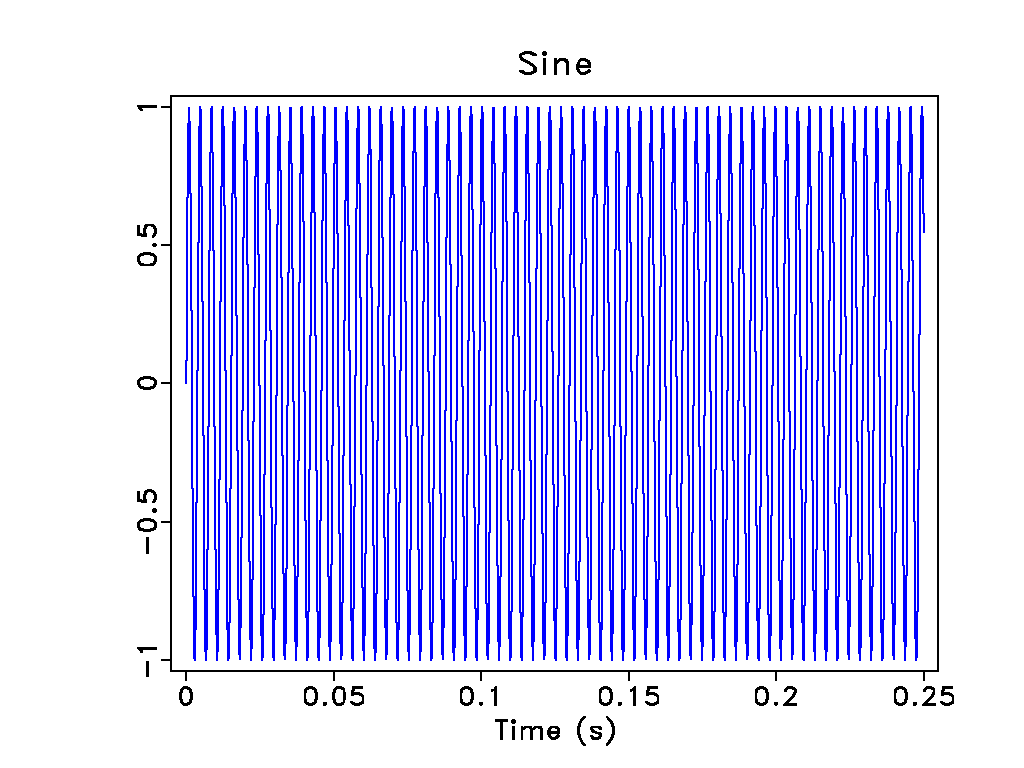

In [3]:
view("sin")

In [4]:
%%file 2_sin80.scons 

# plot the first 80 points
Result('sin80','sin','window n1=80 | graph title=Sine symbol=o grid=y')

Overwriting 2_sin80.scons


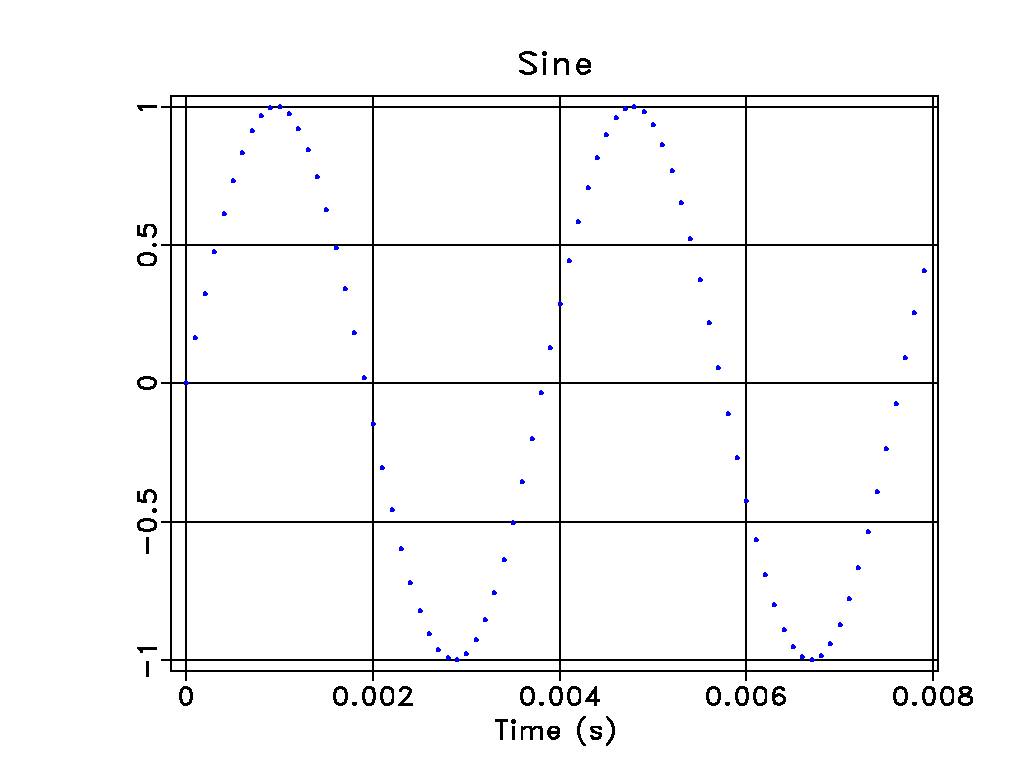

In [5]:
view("sin80")

In [6]:
%%file 3_sines.scons 


# three sine curves
f = [261.6, 329.6, 392.0]
a = [1.5, 0.5, 1]

sins = []
for k in range(3):
    sin = 'sin%d' % k
    Sine(sin,f[k],a[k])
    sins.append(sin)

Flow('sines',sins,'add ${SOURCES[1:3]}')
Result('sines','graph title=Sines unit1=s label1=Time label2=Amplitude')

Overwriting 3_sines.scons


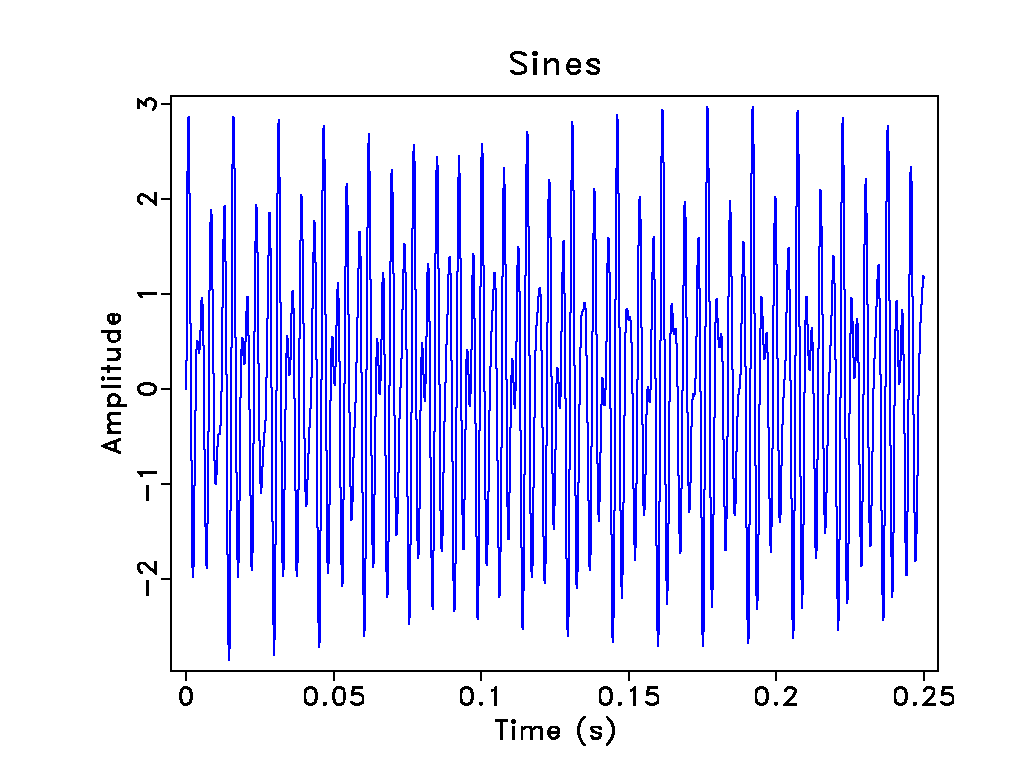

In [7]:
view("sines")

In [8]:
%%file 4_sinest.scons 


# Fourier transform

# tapering with Blackman window
Flow('sinest','sines',
     '''
     math output="input*(0.42 - 0.5*cos(2*x1*%g) + 0.08*cos(4*x1*%g))"
     ''' % (math.pi/0.25,math.pi/0.25))
Result('sinest','graph title="Sines Tapered" ')

Overwriting 4_sinest.scons


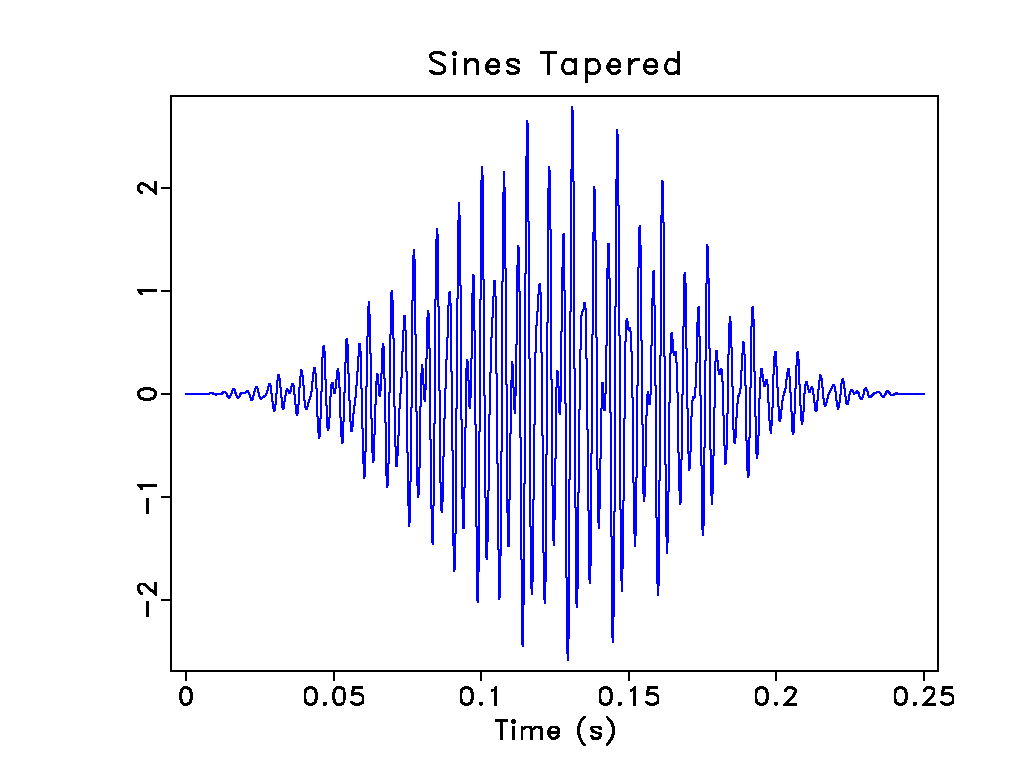

In [9]:
view("sinest")

In [10]:
%%file 5_spectrum.scons 

# get the spectrum
Flow('spectrum','sinest','spectra')
Result('spectrum','window max1=500 | graph title=Spectrum')

Overwriting 5_spectrum.scons


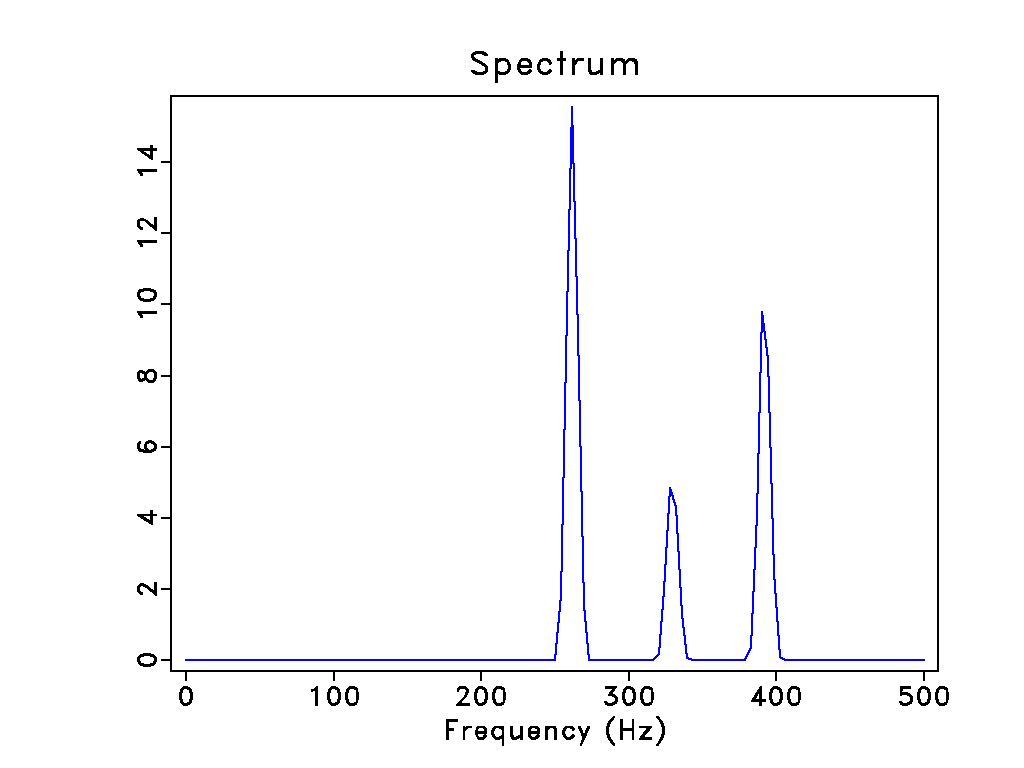

In [11]:
view("spectrum")

In [12]:
%%file 6_filtspectrum.scons 

# filtering in the Fourier domain

# remove the 329.6 Hz
Flow('filtspectrum','spectrum','cut min1=300 max1=356')
Result('filtspectrum','window max1=500 | graph title="Filtered Spectrum"')

Overwriting 6_filtspectrum.scons


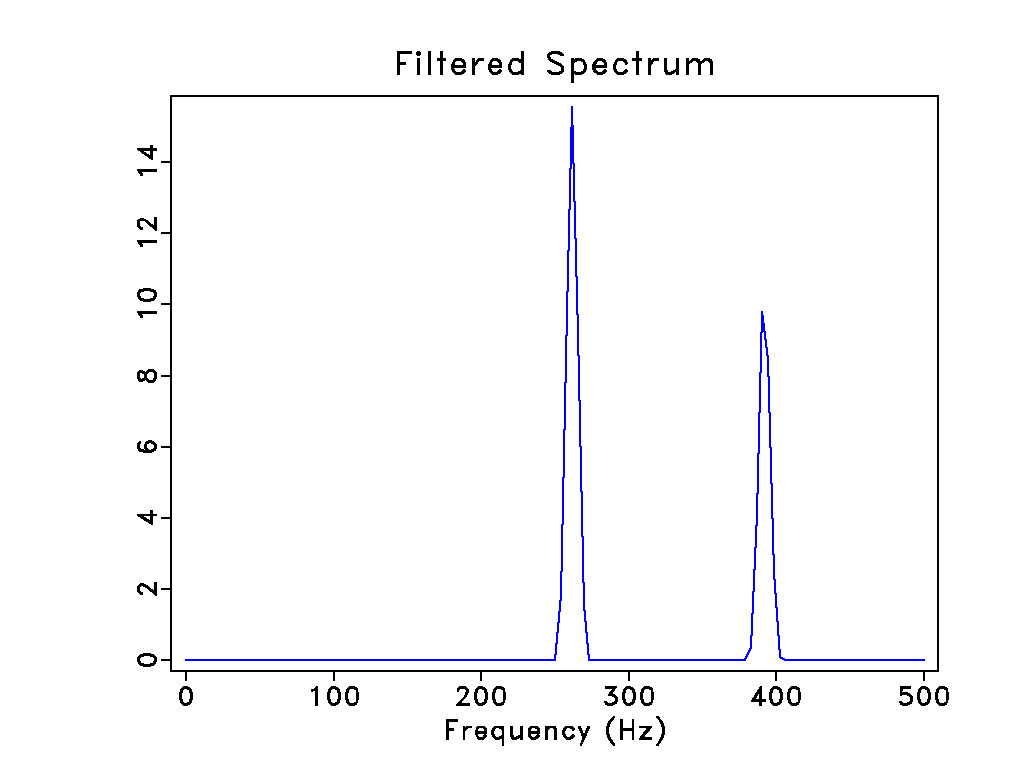

In [13]:
view("filtspectrum")

In [14]:
%%file 7_filtsinest.scons 

# view the filtered signal
Flow('fftsinest','sinest','fft1')
Flow('filtfft','fftsinest','cut min1=300 max1=356')
Flow('filtsinest','filtfft','fft1 inv=y')
Result('filtsinest','graph title="Sines Filtered" unit1=s label1=Time label2=Amplitude')

Overwriting 7_filtsinest.scons


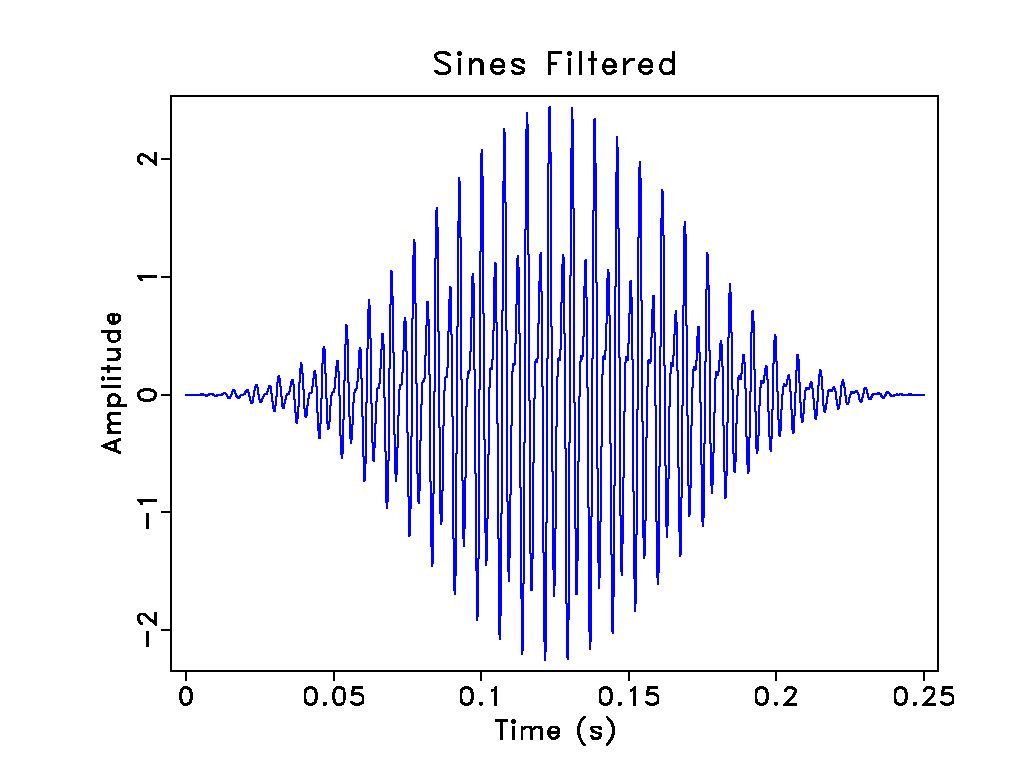

In [15]:
view("filtsinest")

In [16]:
%%file 8_psdsinest.scons 

# power spectral density
Flow('psdsinest','filtfft','math output="input*conj(input)"')
Result('psdsinest','window max1=500 | math output="abs(input)" | real | graph title="Power spectral density"')

Overwriting 8_psdsinest.scons


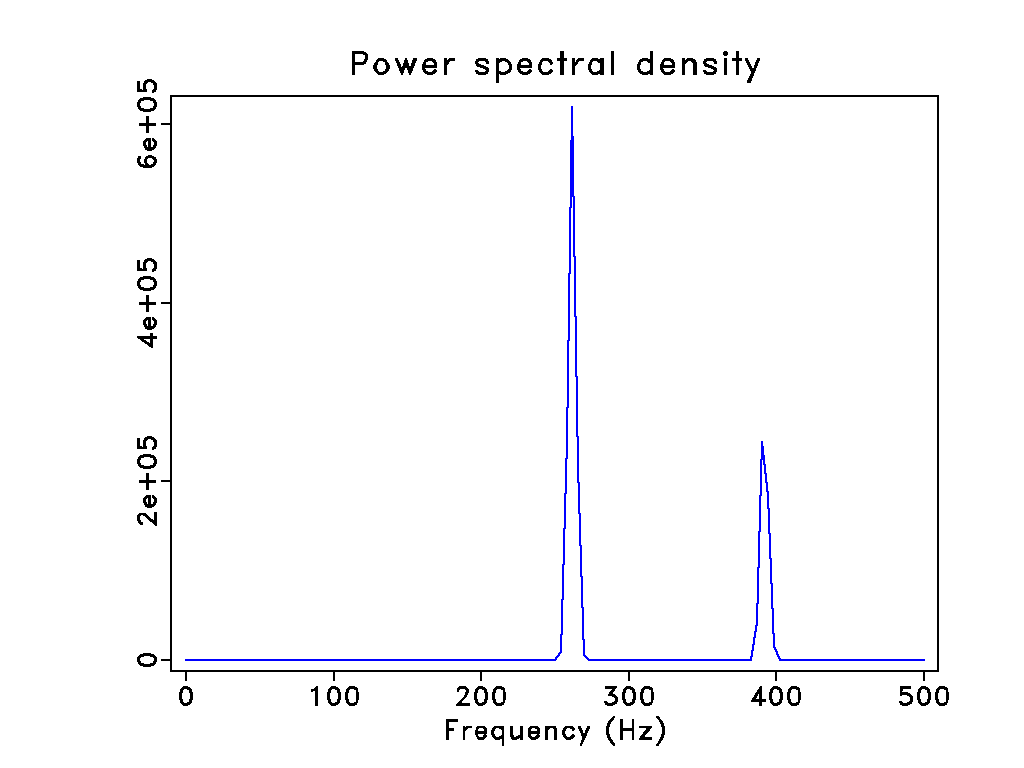

In [17]:
view("psdsinest")

# Example 1: Nonstationary sinusoids

In [18]:
%%file 9_sines2.scons 

# nonstationary signal
Sine('sin2-1',f[0],a[0],n1=1250)
Sine('sin2-2',f[2],a[2],n1=1251)

Flow('sines2','sin2-1 sin2-2','cat ${SOURCES[1]} axis=1')
Result('sines2','graph title="Nonstationary Sines"')

Overwriting 9_sines2.scons


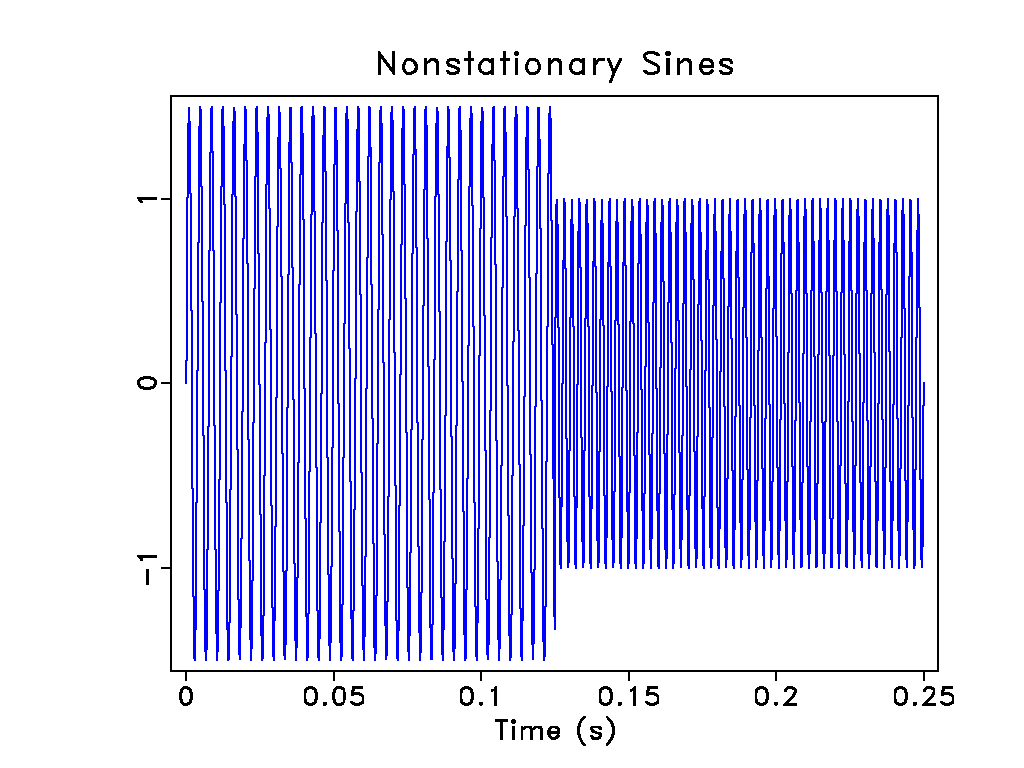

In [19]:
view("sines2")

In [20]:
%%file 10_sinest2.scons 
import math

# Fourier transform

# tapering with Blackman window
Flow('sinest2','sines2',
     '''
     math output="input*(0.42 - 0.5*cos(2*x1*%g) + 0.08*cos(4*x1*%g))"
     ''' % (math.pi/0.25,math.pi/0.25))
Result('sinest2','graph title="Nonstationary Sines Tapered" unit1=s label1=Time label2=Amplitude')

Overwriting 10_sinest2.scons


In [21]:
%%file 11_spectrum2.scons 

# get spectrum
Flow('spectrum2','sinest2','spectra')
Result('spectrum2','window max1=500 | graph title="Nonstationary Sines Spectrum"')

Overwriting 11_spectrum2.scons


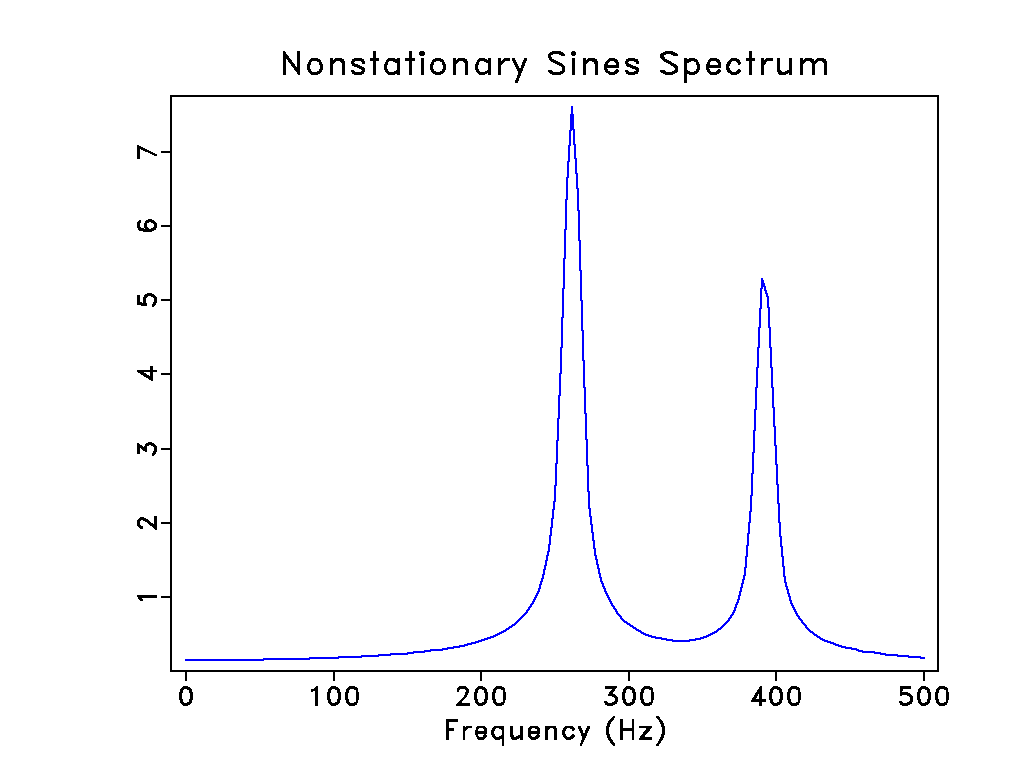

In [22]:
view("spectrum2")

## For this example, we show four ways of visualizing time-frequency data
1) S Transform

2) Short-time Fourier Transform (this is the way the original notebook visualized it)

3) Time-frequency analysis using local attributes

4) Local time-frequency transform

### 1) S Transform

In [23]:
%%file 12_sinest2st.scons 

# ST
Flow('sinest2st','sinest2','st')
Plot('sinest2st','sinest2st YlGnBu_r.csv','math output="abs(input)" | real | byte allpos=y | grey transp=n title="S Transform" color=${SOURCES[1]} max2=1000 yreverse=n min2=0 wherexlabel=b wheretitle=t label2=Frequency unit2=Hz label1=Time unit1=s')
Result('sinest2st','sinest2 sinest2st','OverUnderAniso')

Overwriting 12_sinest2st.scons


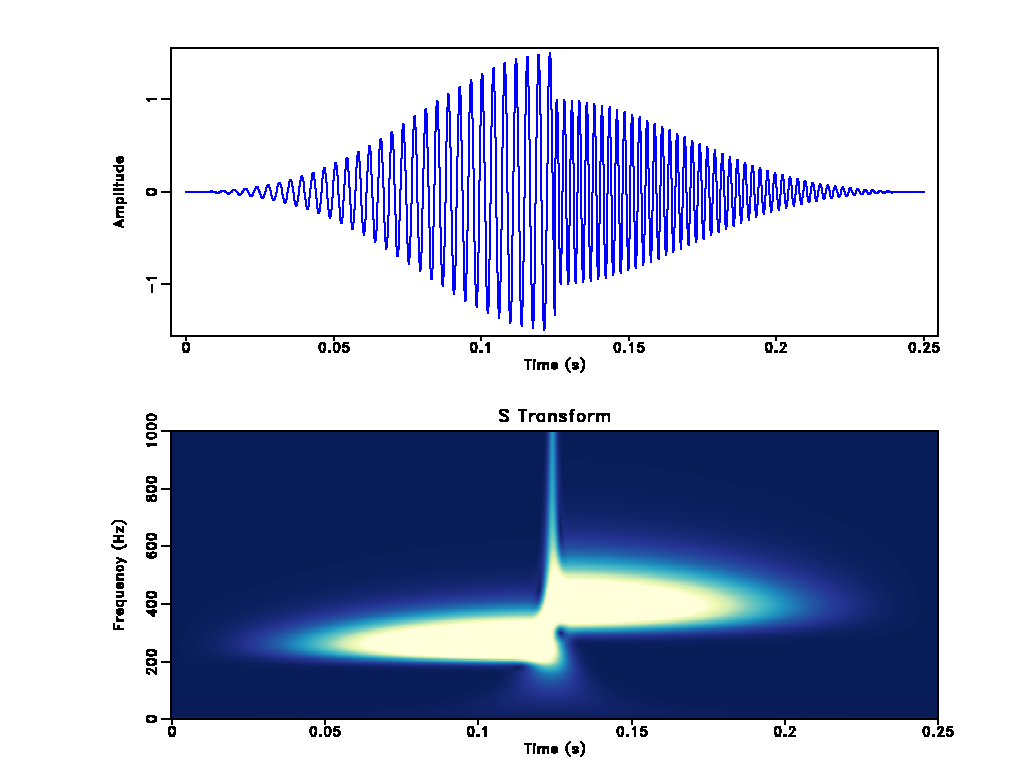

In [24]:
view("sinest2st")

### 2) Short-time Fourier transform
#### this is the way the original notebook visualized it

In [25]:
%%file 13_sinestft.scons 

# Short time Fourier transform
Flow('sinestft','sinest2','stft ntw=512 window=y')
Result('sinestft','sinestft YlGnBu_r.csv','math output="abs(input)" | real | byte allpos=y | grey transp=n title="STFT" color=${SOURCES[1]} yreverse=n wherexlabel=b wheretitle=t label2=Frequency unit2=Hz label1=Time unit1=s allpos=y min2=0 max2=1000 min1=0.025 max1=0.225')

Overwriting 13_sinestft.scons


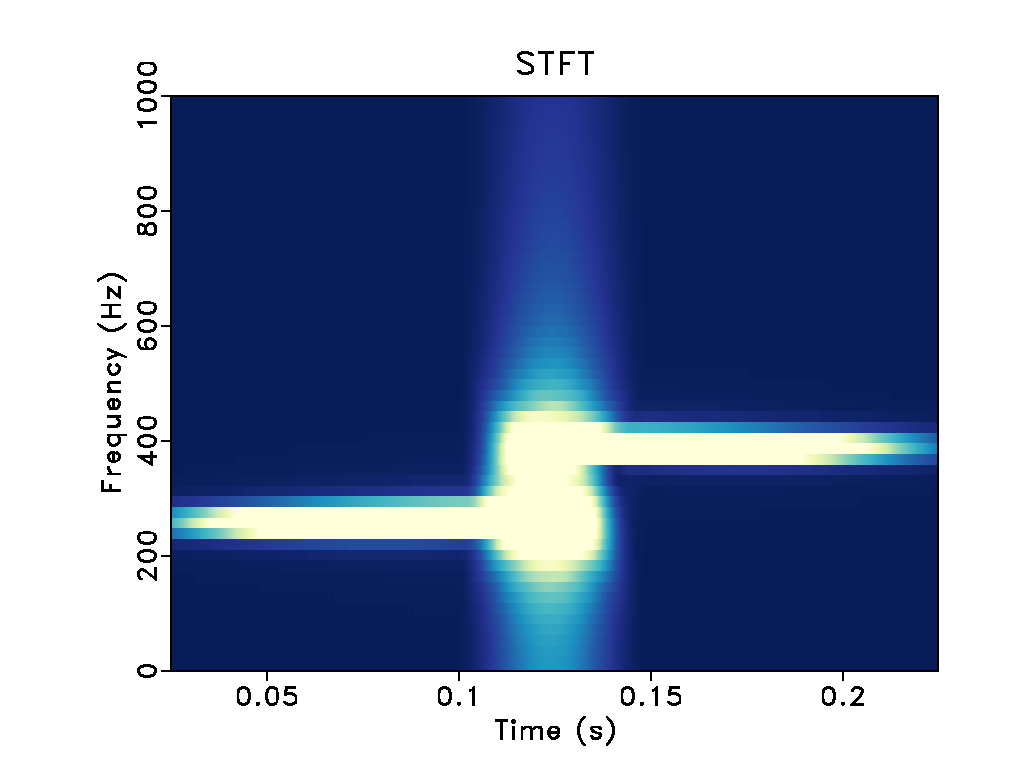

In [26]:
view("sinestft")

### 3) Time-frequency analysis using local attributes

In [27]:
%%file 14_sinest2ltft.scons 

# timefreq
Flow('sinest2ltft500','sinest2','timefreq nw=256 dw=1 rect=500')
Flow('sinest2ltft1000','sinest2','timefreq nw=256 dw=1 w0=256 rect=500')

Flow('sinest2ltft', 'sinest2ltft500 sinest2ltft1000', 'cat ${SOURCES[1]} axis=2')  
Plot('sinest2ltft','sinest2ltft YlGnBu_r.csv','grey transp=n title="LTFT Transform" color=${SOURCES[1]} max2=512 yreverse=n min2=0 wherexlabel=b wheretitle=t label2=Frequency unit2=Hz label1=Time unit1=s allpos=y')
Result('sinest2ltft','sinest2 sinest2ltft','OverUnderAniso')

Overwriting 14_sinest2ltft.scons


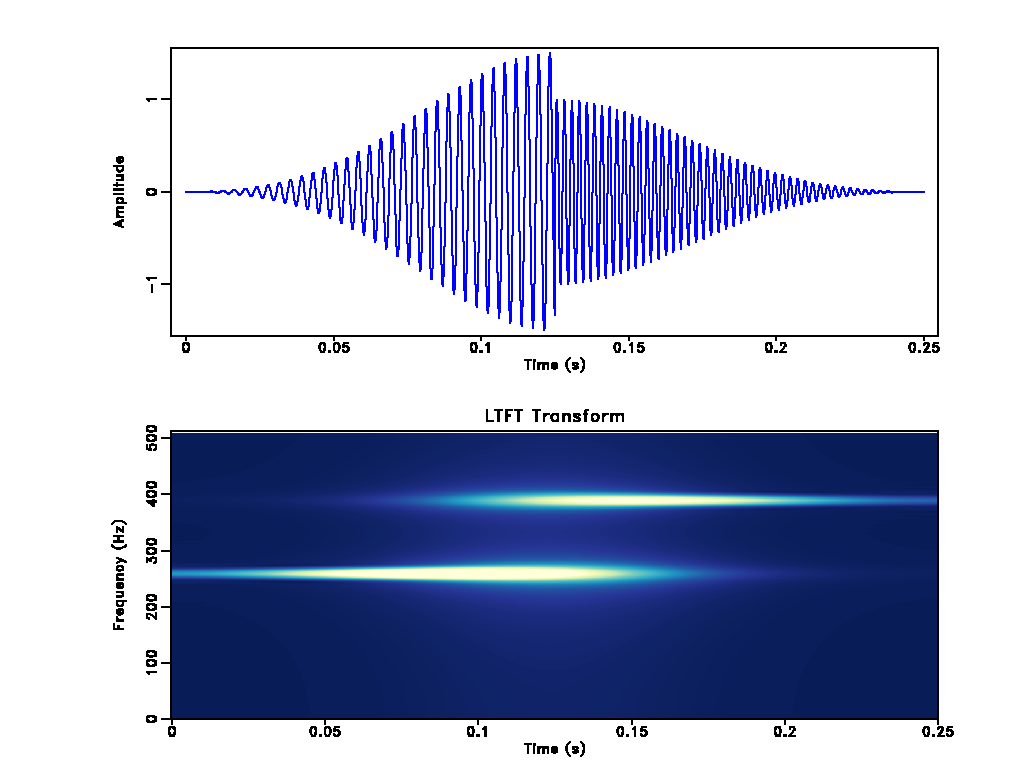

In [28]:
view("sinest2ltft")

### 4) Local-time frequency transform
http://ahay.org/RSF/book/tccs/timefreq/paper_html/paper.html

In [29]:
%%file 15_sinest2fftltft.scons 

# FFT-LTFT
Flow('sinest2fftltft','sinest2','fft1 | cltftfft w0=0 nw=2501 dw=0.0001')
Plot('sinest2fftltft','sinest2fftltft YlGnBu_r.csv','math output="abs(input)" | real | byte allpos=y | grey transp=y title="FFT-LTFT Transform" color=${SOURCES[1]} max1=1000 yreverse=n min1=0 wherexlabel=b wheretitle=t label1=Frequency unit1=Hz label2=Time unit2=s')
Result('sinest2fftltft','sinest2 sinest2fftltft','OverUnderAniso')

Overwriting 15_sinest2fftltft.scons


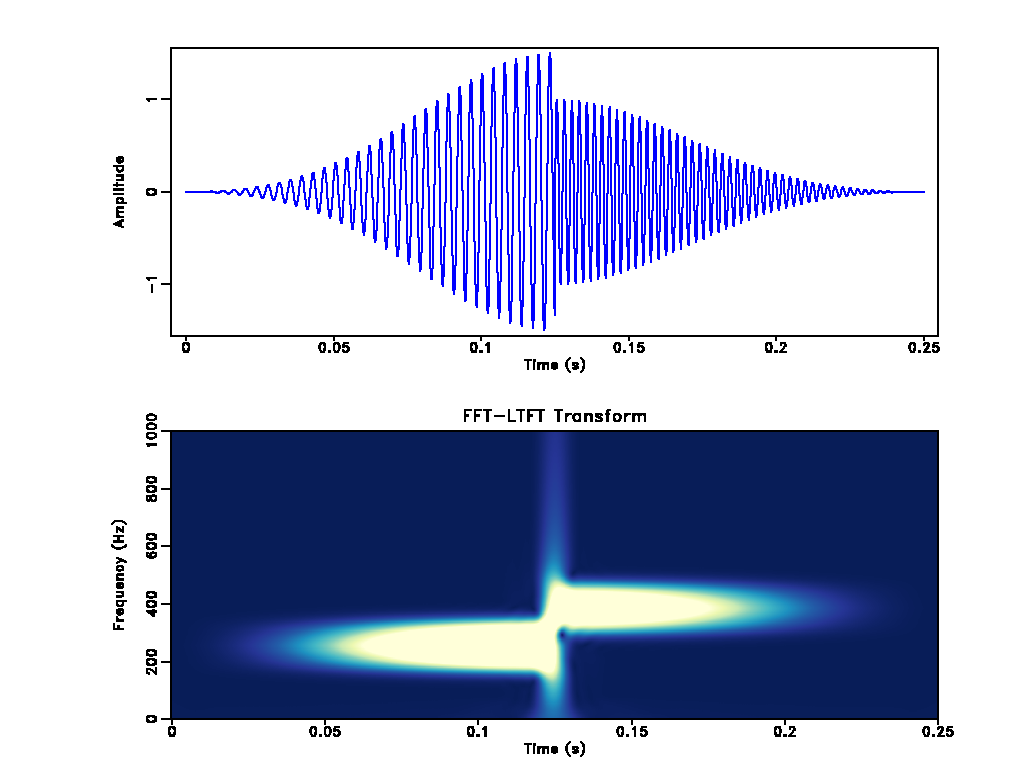

In [30]:
view("sinest2fftltft")

### For all other examples, we will only display the short-time Fourier Transform as is used in the original notebook

# Example 2: Piano

In [31]:
%%file 16_piano.scons 

## Piano music

# get the data
Fetch('piano_22050Hz.txt','signals',
        server='https://raw.githubusercontent.com',
        top='seg/tutorials-2018/master/1806_Time-frequency')
Flow('piano.txt','piano_22050Hz.txt','/usr/bin/tail -n +5')
Flow('piano','piano.txt','echo in=$SOURCE n1=220500 o1=0 d1=4.5351e-5 data_format=ascii_float | dd form=native') 

Overwriting 16_piano.scons


In [32]:
%%file 17_pianostft.scons 

# stft
Flow('pianostft','piano','stft ntw=2048 window=y')

# view result
Plot('piano','graph title="Piano music" wanttitle=n unit1=s label1=Time label2=Amplitude')
Plot('pianostft','pianostft YlGnBu_r.csv','window j1=10 min2=0 max2=1000 | math output="abs(input)" | real | byte allpos=y | grey transp=n title="STFT" color=${SOURCES[1]} yreverse=n wherexlabel=b wheretitle=t label2=Frequency unit2=Hz label1=Time unit1=s allpos=y')
Result('pianostft', 'piano pianostft','OverUnderAniso')

Overwriting 17_pianostft.scons


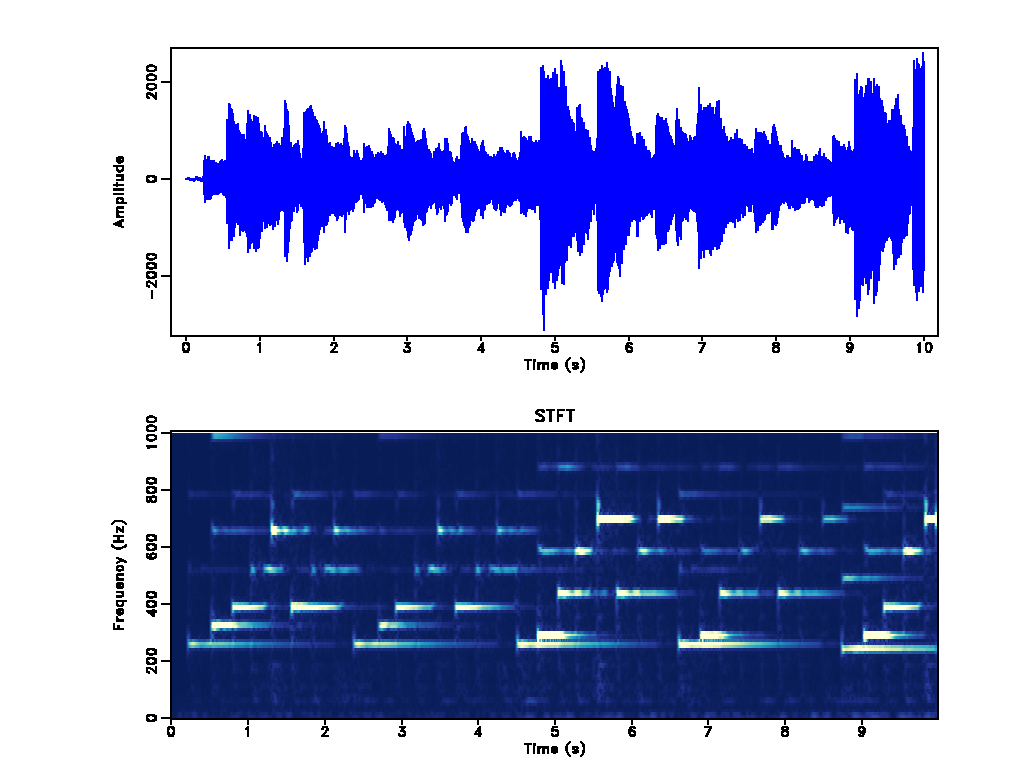

In [33]:
view("pianostft")

# Example 3: Human voice

In [34]:
%%file 18_seg.scons 

## Human voice

# get the data
Fetch('seg_44100Hz.txt','signals',
        server='https://raw.githubusercontent.com',
        top='seg/tutorials-2018/master/1806_Time-frequency')
Flow('seg.txt','seg_44100Hz.txt','/usr/bin/tail -n +5')
Flow('seg','seg.txt','echo in=$SOURCE n1=28672 o1=0 d1=2.27e-5 data_format=ascii_float | dd form=native') 

Writing 18_seg.scons


In [35]:
%%file 19_segstft.scons 

# stft
Flow('segstft','seg','stft ntw=512 window=y')

# view result
Plot('seg','graph title="Human voice" wanttitle=n unit1=s label1=Time label2=Amplitude')
Plot('segstft','segstft YlGnBu_r.csv','math output="abs(input)" | real | byte allpos=y | grey transp=n title="STFT" color=${SOURCES[1]} yreverse=n wherexlabel=b wheretitle=t label2=Frequency unit2=Hz label1=Time unit1=s allpos=y')
Result('segstft', 'seg segstft','OverUnderAniso')

Writing 19_segstft.scons


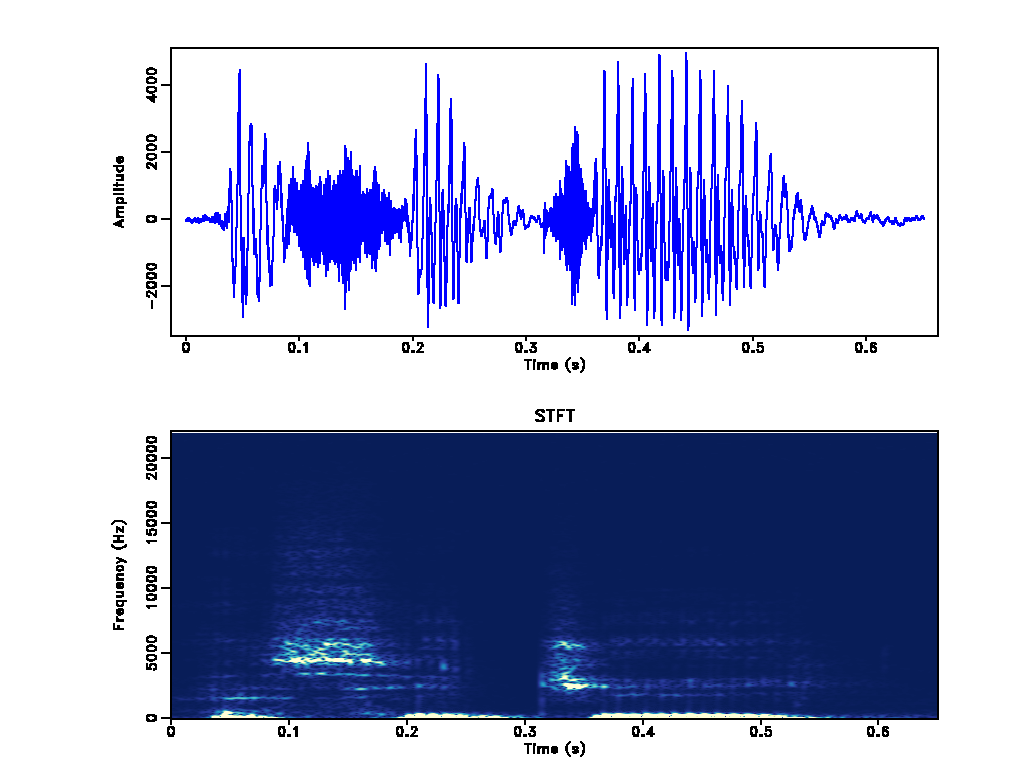

In [36]:
view("segstft")

# Example 4: Bat chirps

In [37]:
%%file 20_bat.scons 

## Bat

# Human earing limit
Flow('humanear',None,'spike n1=12001 d1=4.00641 o1=0 k1=4493 l1=4493 | math output="18000*input"')
Plot('humanear','graph wanttitle=n transp=y wantaxis=n plotcol=1 lotfat=5')

# get the data
Fetch('bat_96000Hz.txt','signals',
        server='https://raw.githubusercontent.com',
        top='seg/tutorials-2018/master/1806_Time-frequency')
Flow('bat.txt','bat_96000Hz.txt','/usr/bin/tail -n +6')
Flow('bat','bat.txt','echo in=$SOURCE n1=480000 o1=0 d1=1.04e-5 data_format=ascii_float | dd form=native')

Writing 20_bat.scons


In [38]:
%%file 21_batstft.scons 

# stft
Flow('batstft','bat','stft ntw=256 window=y')

# view result
Plot('bat','graph title="Bat chirps" wanttitle=n unit1=s label1=Time label2=Amplitude')
Plot('batstft','batstft YlGnBu_r.csv','window j1=25 | math output="abs(input)" | real | byte allpos=y | grey transp=n title="STFT" color=${SOURCES[1]} yreverse=n wherexlabel=b wheretitle=t label2=Frequency unit2=Hz label1=Time unit1=s allpos=y')
Plot('batsthuman','batstft humanear','Overlay')
Result('batstft', 'bat batsthuman','OverUnderAniso')

Writing 21_batstft.scons


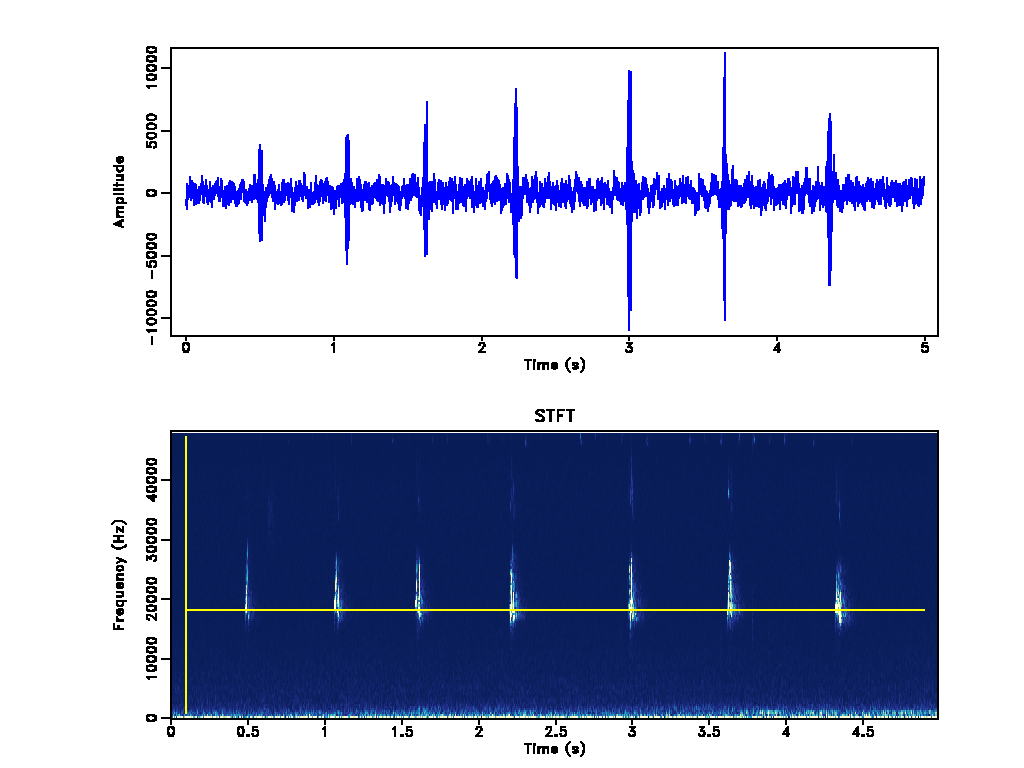

In [39]:
view("batstft")

# Example 5: Volcanic tremor

In [40]:
%%file 22_tremorstft.scons 

## Tremor

# get the data
Fetch('tremor_100Hz.txt','signals',
        server='https://raw.githubusercontent.com',
        top='seg/tutorials-2018/master/1806_Time-frequency')
Flow('tremor.txt','tremor_100Hz.txt','/usr/bin/tail -n +5')
Flow('tremor','tremor.txt','echo in=$SOURCE n1=90001 o1=0 d1=0.01 data_format=ascii_float | dd form=native') 

# stft
Flow('tremorstft','tremor','stft ntw=256 window=y')

# view result
Plot('tremor','graph title="Tremor" unit1=s label1=Time label2=Amplitude')
Plot('tremorstft','tremorstft YlGnBu_r.csv','window j1=10 | math output="abs(input)" | real | byte allpos=y | grey transp=n title="STFT" color=${SOURCES[1]} yreverse=n wherexlabel=b wheretitle=t label2=Frequency unit2=Hz label1=Time unit1=s allpos=y')
Result('tremorstft', 'tremor tremorstft','OverUnderAniso')

Writing 22_tremorstft.scons


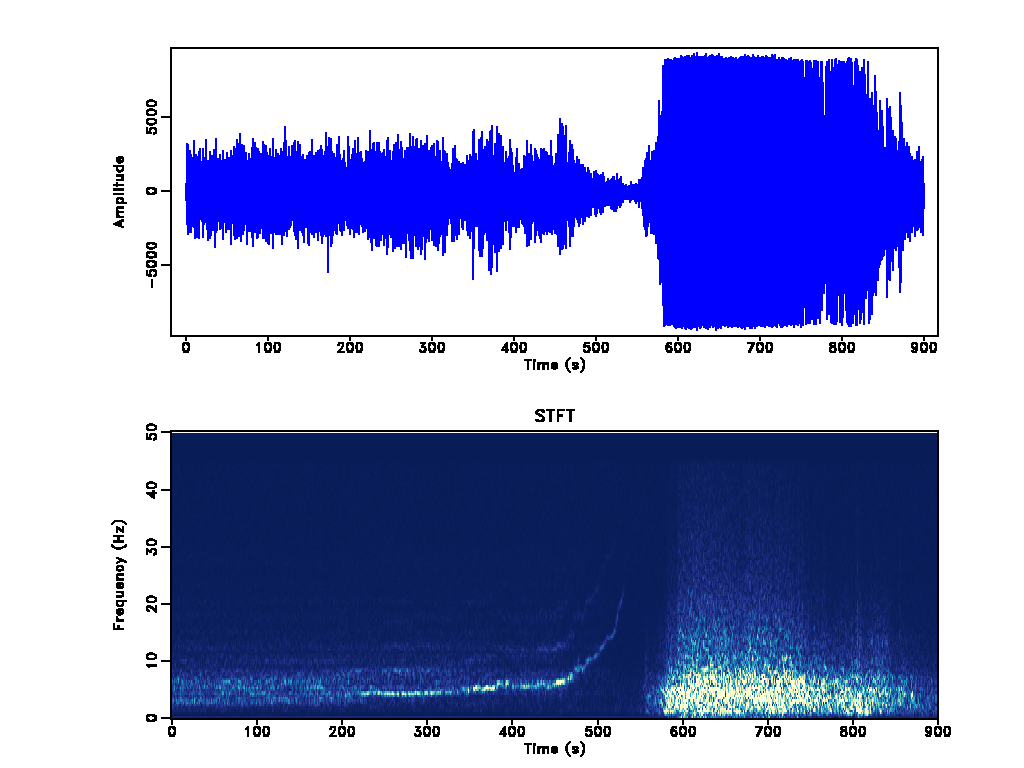

In [41]:
view("tremorstft")